## Loan Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px


In [2]:
df = pd.read_excel("C:\\Users\\shashank\\OneDrive\\Desktop\\financial_loan_data_excel.xlsx")

In [3]:
#no. of rows and columns
df.shape

(38576, 24)

In [4]:
#top 5 rows
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [5]:
#last 5 rows

df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


In [6]:
#datatpes
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [7]:
#summary
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Total  Loan Analysis 

In [8]:
total_loan_application=df['id'].count()
print(total_loan_application)

38576


In [9]:
lat_date = df['issue_date'].max()
lat_year = lat_date.year
lat_month = lat_date.month

mtd_data = df[(df['issue_date'].dt.year == lat_year) & (df['issue_date'].dt.month == lat_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications (for {lat_date.strftime('%B %Y')}): {mtd_loan_applications}")


MTD Loan Applications (for December 2021): 4314


## Total Funded Amount

In [10]:
total_funded_amount=df['loan_amount'].sum()
print("total Funded Amount is",total_funded_amount)
#total funded amount in million 

total_funded_amount_million=total_funded_amount/1000000
print("total Funded Amount in Millions is ${:.2f}M".format(total_funded_amount_million))

total Funded Amount is 435757075
total Funded Amount in Millions is $435.76M


## MTD Total Funded Amount

In [11]:
mtd_total_funded_amount=mtd_data['loan_amount'].sum()
mtd_total_funded_amount_million=mtd_total_funded_amount/1000000
print("total funded amount is",mtd_total_funded_amount)
print("total funded amount in million is ${:.2f}M".format(mtd_total_funded_amount_million))


total funded amount is 53981425
total funded amount in million is $53.98M


## Total Amount Received


In [12]:
total_amount_received=df['total_payment'].sum()
total_amount_received_million=total_amount_received/1000000
print('total amount received is', total_amount_received)
print('total amount received  million ${:.2f}M'.format(total_amount_received_million))



total amount received is 473070933
total amount received  million $473.07M


## MTD-Total Amount Received

In [13]:
mtd_total_amount_received=mtd_data['total_payment'].sum()
mtd_total_amount_received_million=mtd_total_amount_received/1000000
print('mtd total amount received',mtd_total_amount_received)
print('mtd total amount received in millions is ${:.2f}M'.format(mtd_total_amount_received_million))

mtd total amount received 58074380
mtd total amount received in millions is $58.07M


## Avg Interest Rate

In [14]:
avg_interest_rate=df['int_rate'].mean()*100
print ('average interest rate is {:.2f}%'.format(avg_interest_rate))

average interest rate is 12.05%


## Avg DTI(Debt To Income Ratio)

In [15]:
avg_DTI=df['dti'].mean()*100
print ('average DTI is {:.2f}%'.format(avg_DTI))

average DTI is 13.33%


## Loan KPI




### Good Loan

In [16]:
# Filter good loans by status
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

# Total loan applications
total_loan_applications = df['id'].count()

# Good loan metrics
good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

# Convert amounts to millions
good_loan_funded_amount_millions = good_loan_funded_amount / 1_000_000
good_loan_received_millions = good_loan_received / 1_000_000

# Good loan application percentage
good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

# Print results
print("Good Loan Applications:", good_loan_applications)
print(
    "Good Loan Funded Amount (in Millions): ${:.2f}M"
    .format(good_loan_funded_amount_millions)
)
print(
    "Good Loan Total Received (in Millions): ${:.2f}M"
    .format(good_loan_received_millions)
)
print(
    "Percentage of Good Loan Applications: {:.2f}%"
    .format(good_loan_percentage)
)


Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


### Bad Loans

In [17]:
# Filter bad loans by status
bad_loans = df[df['loan_status'].isin(['Charged Off'])]

# Total loan applications
total_loan_applications = df['id'].count()

# bad loan metrics
bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

# Convert amounts to millions
bad_loan_funded_amount_millions = bad_loan_funded_amount / 1_000_000
bad_loan_received_millions = bad_loan_received / 1_000_000

# bod loan application percentage
bad_loan_percentage = (good_loan_applications / total_loan_applications) * 100

# Print results
print("bad Loan Applications:", bad_loan_applications)
print(
    "bad Loan Funded Amount (in Millions): ${:.2f}M"
    .format(bad_loan_funded_amount_millions)
)
print(
    "bad Loan Total Received (in Millions): ${:.2f}M"
    .format(bad_loan_received_millions)
)
print(
    "Percentage of bad Loan Applications: {:.2f}%"
    .format(bad_loan_percentage)
)


bad Loan Applications: 5333
bad Loan Funded Amount (in Millions): $65.53M
bad Loan Total Received (in Millions): $37.28M
Percentage of bad Loan Applications: 86.18%


## Monthly trend by issued date for total funded amount

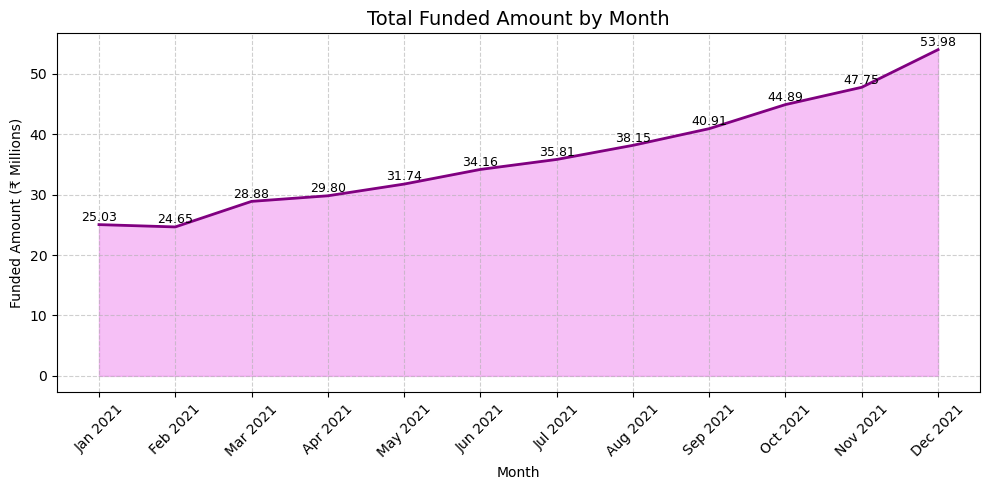

In [18]:
# Aggregate funded amount by month and convert to millions
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1_000_000)
      .reset_index(name='loan_amount_millions')
)

# Plot area + line chart with labels
plt.figure(figsize=(10, 5))
plt.fill_between(
    monthly_funded['month_name'],
    monthly_funded['loan_amount_millions'],
    color='violet',
    alpha=0.5
)
plt.plot(
    monthly_funded['month_name'],
    monthly_funded['loan_amount_millions'],
    color='Purple',
    linewidth=2
)

# Value labels on each point
for i, row in monthly_funded.iterrows():
    plt.text(
        i,
        row['loan_amount_millions'] + 0.1,
        f"{row['loan_amount_millions']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (₹ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Monthly trends by issue Date for Total Amount Received

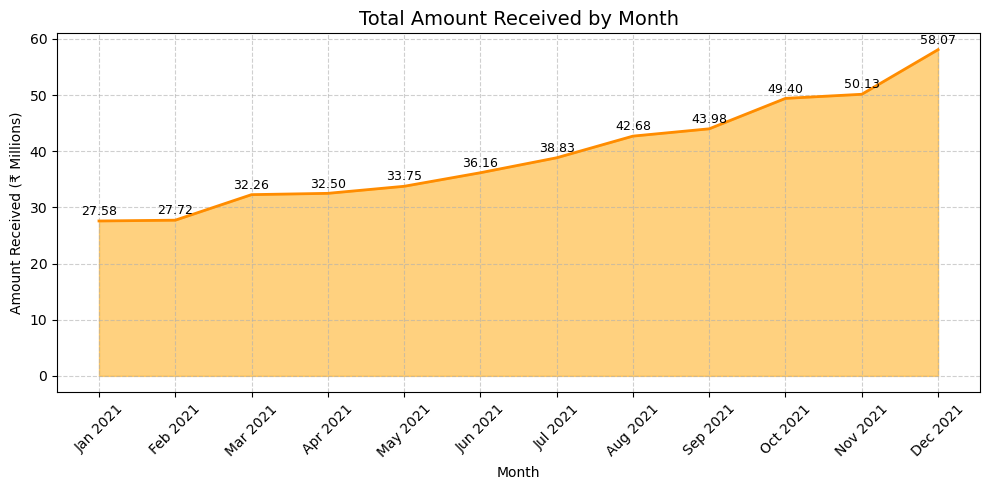

In [30]:
import matplotlib.pyplot as plt

# Monthly Applications: aggregate counts by issue month
monthly_amount_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1000000)  # convert to millions
      .reset_index(name='received_amount_million')
)

# Prepare x and y values
x = range(len(monthly_amount_received))
y = monthly_amount_received['received_amount_million']

# Plot: filled area + line for monthly application counts
plt.figure(figsize=(10, 5))
plt.fill_between(
    monthly_amount_received['month_name'],
    monthly_amount_received['received_amount_million'],
    color='Orange',
    alpha=0.5)
plt.plot(monthly_amount_received['month_name'], monthly_amount_received['received_amount_million'], color='DarkOrange', linewidth=2)

# Add value labels above each point
for i, val in enumerate(y):
    plt.text(
        i, val + 0.5,
        f"{val:.2f}",  # show 2 decimal places
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.title('Total Amount Received by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Amount Received (₹ Millions)')
plt.xticks(ticks=x, labels=monthly_amount_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## Monthly Trneds by Issue Date for Total Loan Application

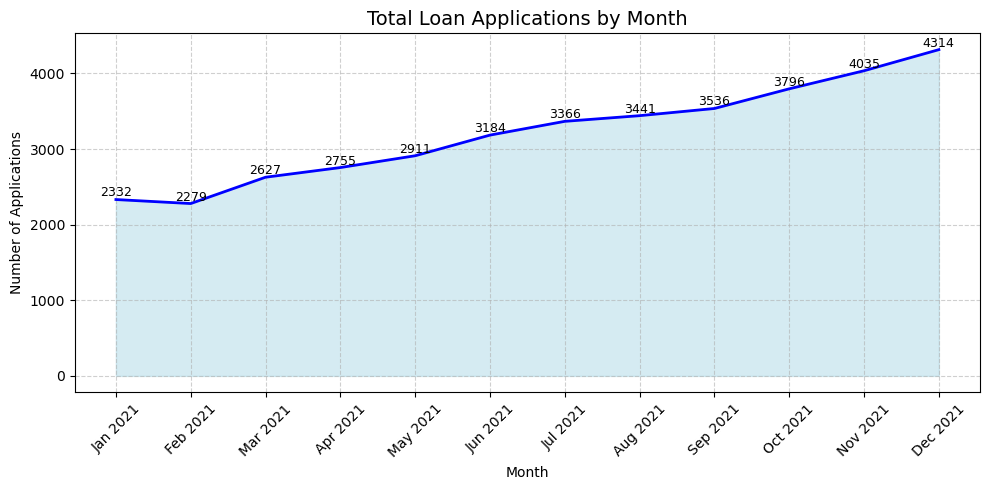

In [27]:
# Monthly Applications: aggregate counts by issue month
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='loan_applications_count')
)

# Plot: filled area + line for monthly application counts
plt.figure(figsize=(10, 5))
plt.fill_between(
    monthly_applications['month_name'],
    monthly_applications['loan_applications_count'],
    color='LightBlue',
    alpha=0.5
)
plt.plot(
    monthly_applications['month_name'],
    monthly_applications['loan_applications_count'],
    color='blue',
    linewidth=2
)

# Add value labels above each point
for i, row in monthly_applications.iterrows():
    plt.text(
        i,
        row['loan_applications_count'] + 0.5,
        f"{row['loan_applications_count']}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(
    ticks=range(len(monthly_applications)),
    labels=monthly_applications['month_name'],
    rotation=45
)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Regional Analysis by State for Total Funded Amount

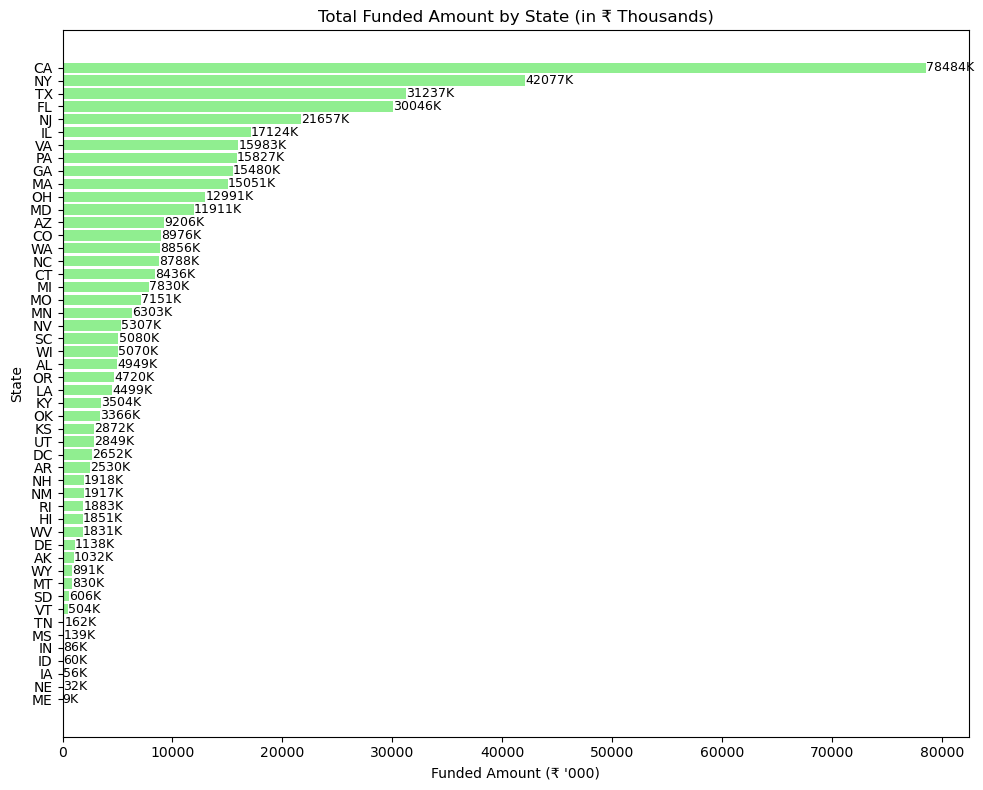

In [36]:

state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightGreen')

# Add value labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel('Funded Amount (₹ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Amount Received


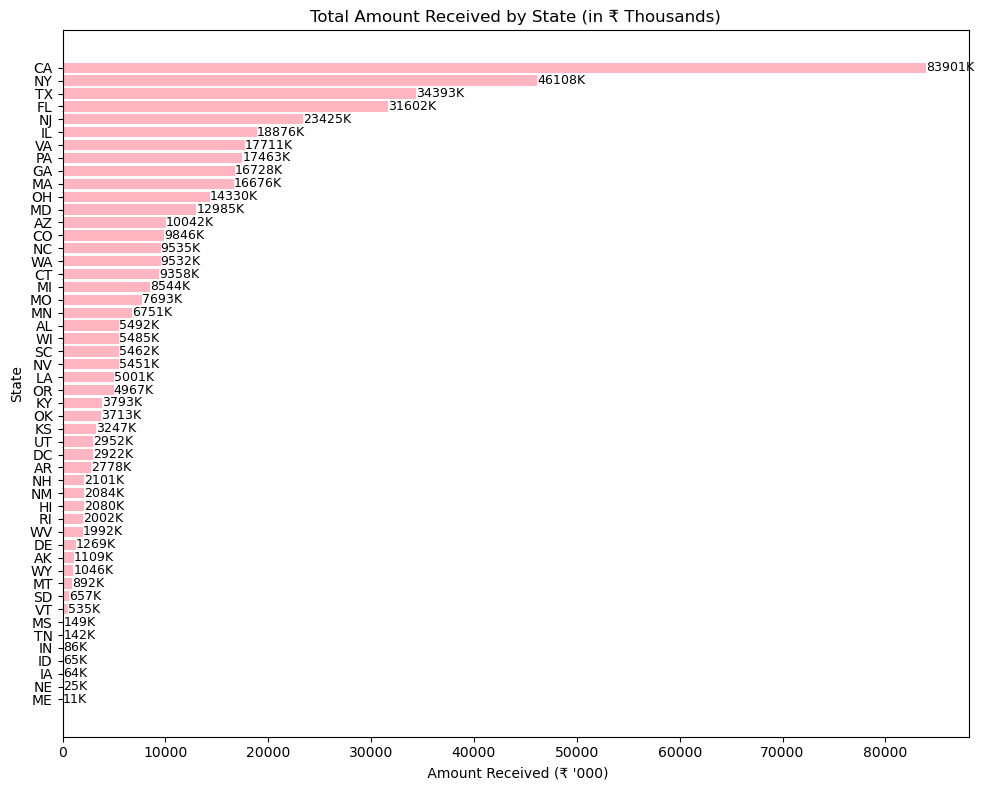

In [38]:
state_amount_received = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_amount_received_thousands = state_amount_received / 1000

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(state_amount_received_thousands.index, state_amount_received_thousands.values, color='lightPink')

# Add value labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K', va='center', fontsize=9)

plt.title('Total Amount Received by State (in ₹ Thousands)')
plt.xlabel(' Amount Received (₹ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Loan Application


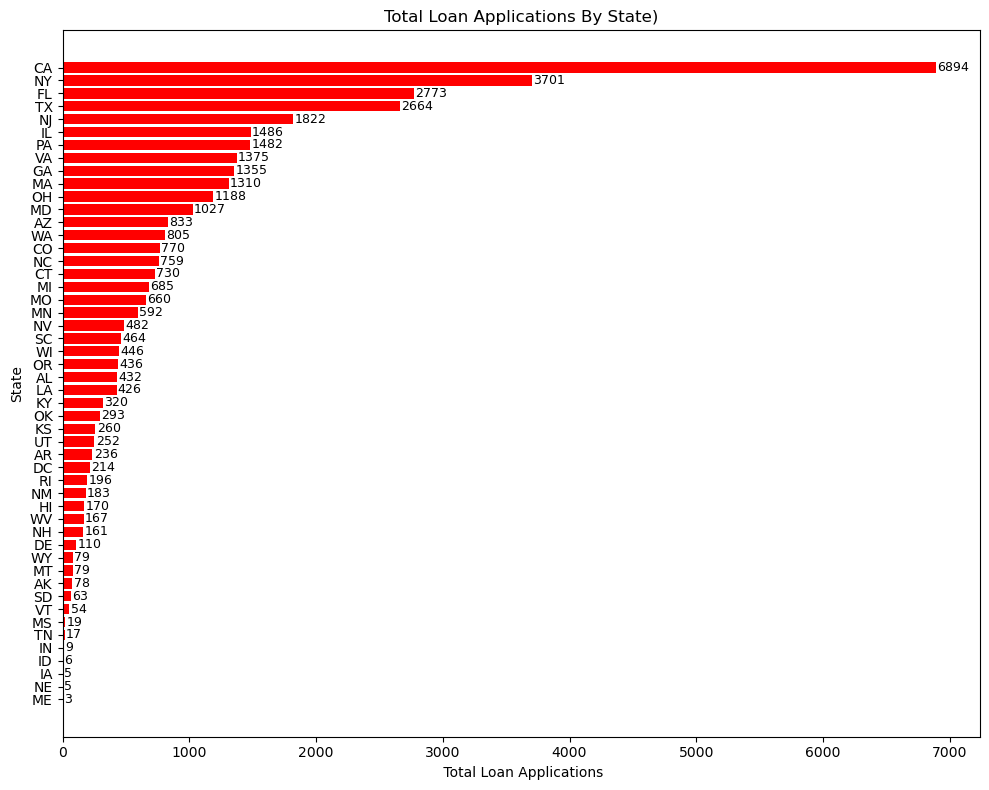

In [45]:
state_loan_application = df.groupby('address_state')['id'].count().sort_values(ascending=True)
state_loan_application_thousands = state_loan_application / 1000

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(state_loan_application_thousands.index, state_loan_application.values, color='red')

# Add value labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}', va='center', fontsize=9)

plt.title('Total Loan Applications By State)')
plt.xlabel(' Total Loan Applications')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## Long Term Analysis by Total Funded Account


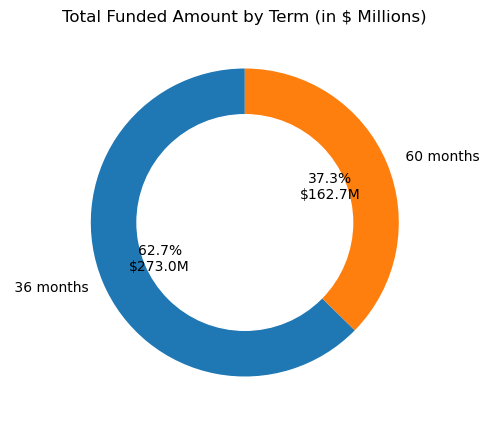

In [46]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

## Long Term Analysis by Total  Amount Received

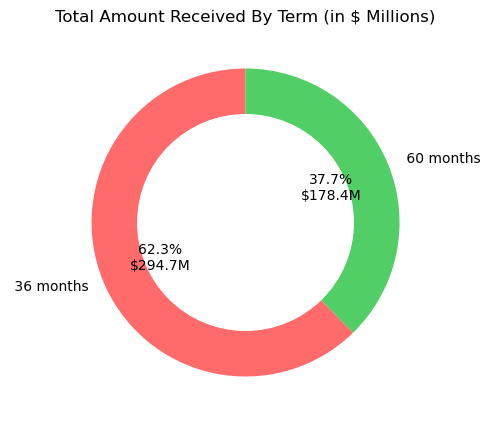

In [57]:
amount_received_millions = df.groupby('term')['total_payment'].sum() / 1000000

# Define custom colors - green and red
colors = ['#ff6b6b', '#51cf66', '#ff6b6b', '#51cf66', '#ff6b6b']

plt.figure(figsize=(5, 5))
plt.pie(
    amount_received_millions,
    labels=amount_received_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(amount_received_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4},
    colors=colors  # Using green and red colors
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Amount Received By Term (in $ Millions)")
plt.show()

## Long Term Analysis by Total Loan Application


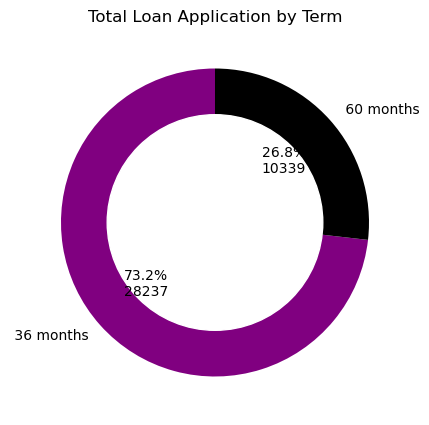

In [63]:
terms_loan_application = df.groupby('term')['id'].count()

# Define custom colors - purple and black
colors = ['#800080', '#000000', '#800080', '#000000', '#800080']

plt.figure(figsize=(5, 5))
plt.pie(
    terms_loan_application,
    labels=terms_loan_application.index,
    autopct=lambda p: f"{p:.1f}%\n{p*sum(terms_loan_application)/100:.0f}",
    startangle=90,
    wedgeprops={'width': 0.4},
    colors=colors  # Using purple and black colors
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Loan Application by Term")
plt.show()

## Employee length  by Total Funded Account

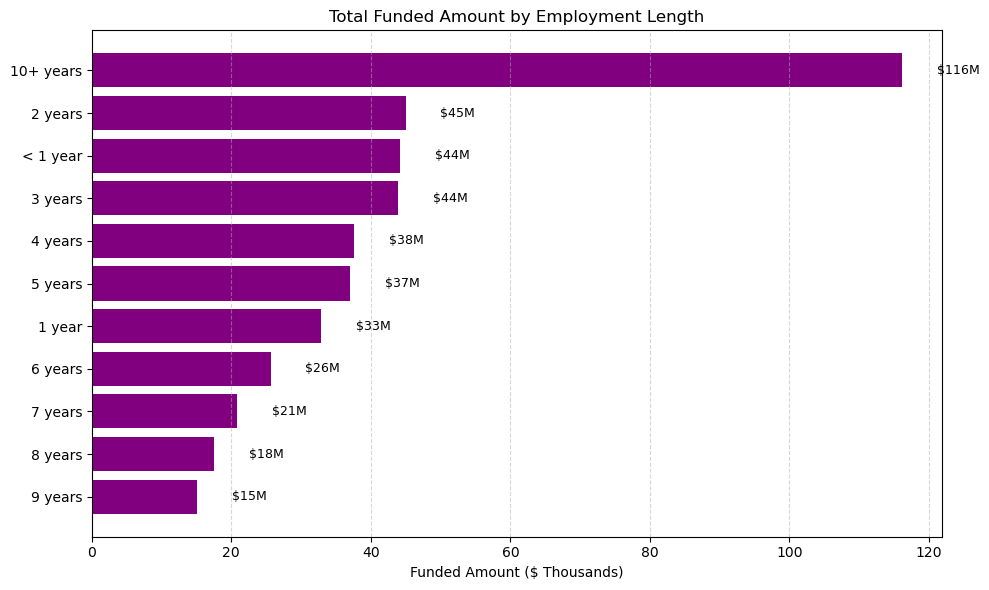

In [81]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding.index, emp_funding, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"${width:.0f}M", va='center', fontsize=9)

plt.xlabel("Funded Amount ($ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Employee length  by Total Amount Received

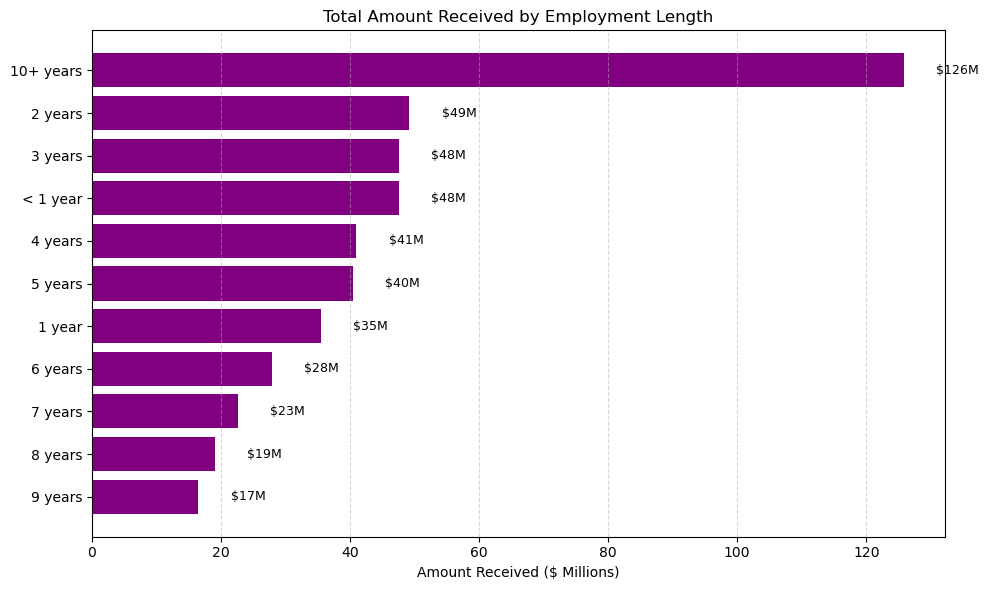

In [70]:
emp_amount_received = df.groupby('emp_length')['total_payment'].sum().sort_values() / 1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_amount_received.index, emp_amount_received, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"${width:.0f}M", va='center', fontsize=9)

plt.xlabel("Amount Received ($ Millions)")
plt.title("Total Amount Received by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Employee length  by Total Loan Applications

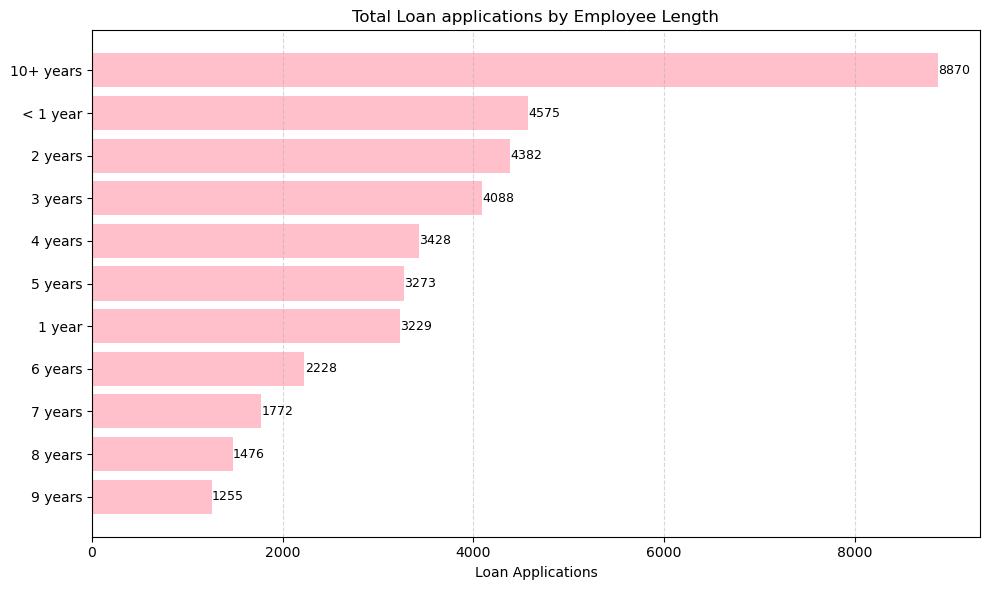

In [93]:
emp_loan_application = df.groupby('emp_length')['id'].count().sort_values() 

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_loan_application.index, emp_loan_application, color='pink')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:.0f}", va='center', fontsize=9)

plt.xlabel("Loan Applications")
plt.title("Total Loan applications by Employee Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Loan Purpose  by Total Funded Amount


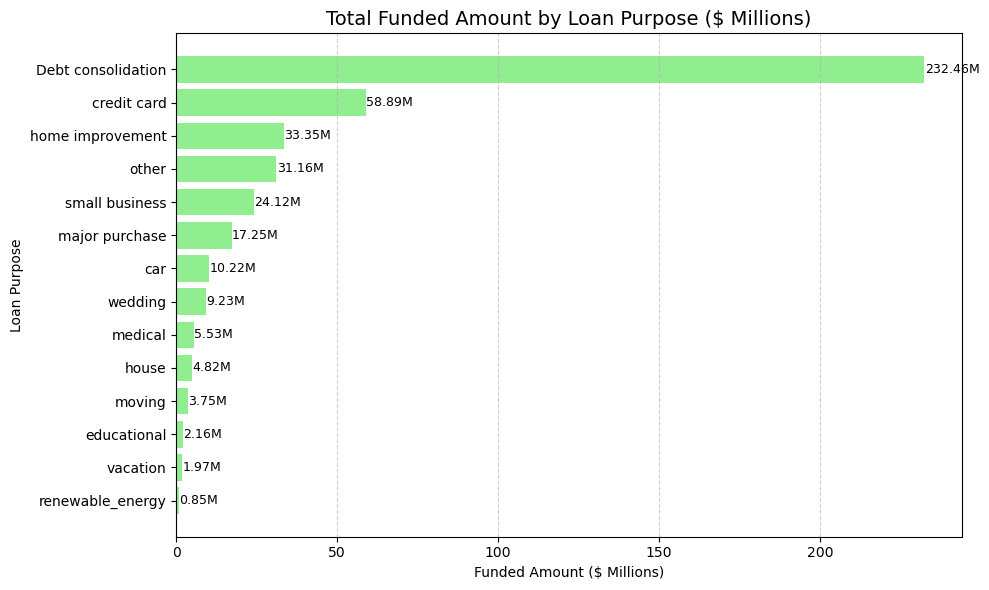

In [85]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values() / 1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='LightGreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}M', va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose ($ Millions)', fontsize=14)
plt.xlabel('Funded Amount ($ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Loan Purpose  by Total Received Amount

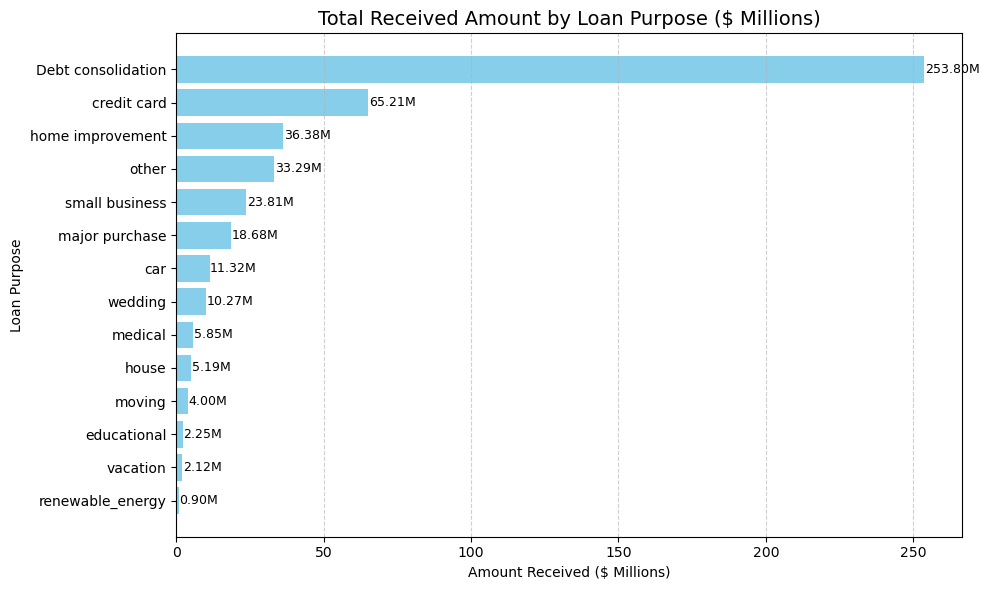

In [87]:
purpose_received_amount = (df.groupby('purpose')['total_payment'].sum().sort_values() / 1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_received_amount.index, purpose_received_amount.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}M', va='center', fontsize=9)

plt.title('Total Received Amount by Loan Purpose ($ Millions)', fontsize=14)
plt.xlabel('Amount Received ($ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Loan Purpose  by Total Loan Application

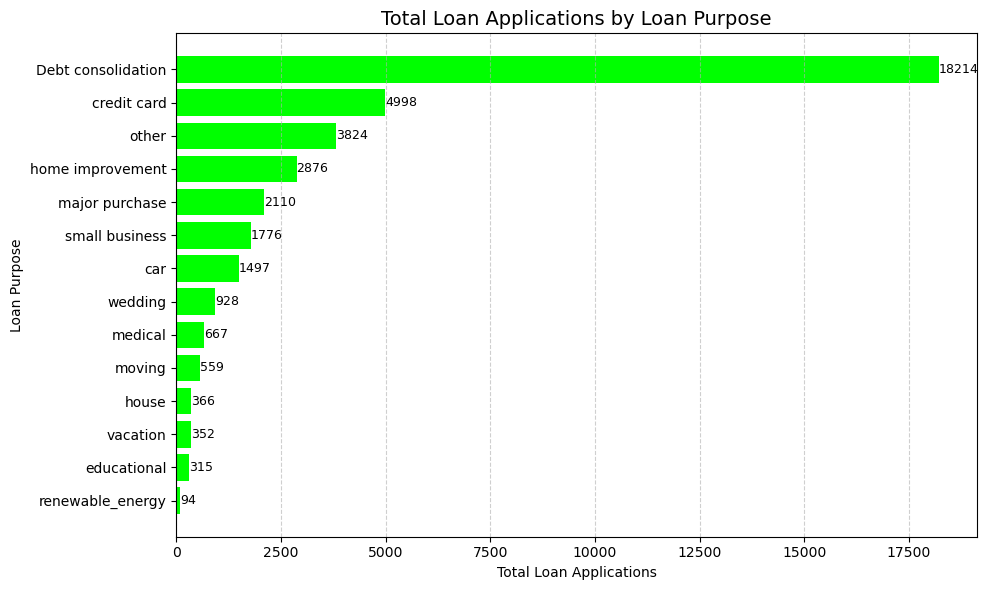

In [94]:
purpose_loan_application = (df.groupby('purpose')['id'].count().sort_values() )

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_loan_application.index, purpose_loan_application.values, color='Lime')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.0f}', va='center', fontsize=9)

plt.title('Total Loan Applications by Loan Purpose', fontsize=14)
plt.xlabel('Total Loan Applications')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Home Ownership  by Total Funded Amount

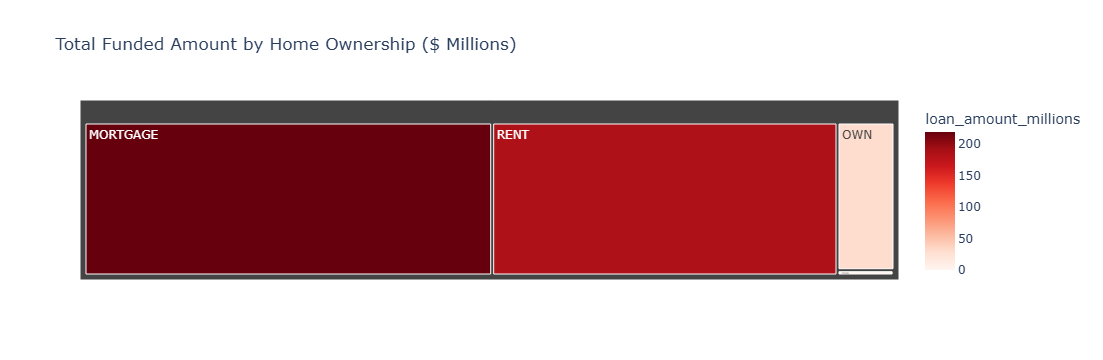

In [96]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1_000_000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Reds',
    title='Total Funded Amount by Home Ownership ($ Millions)'
)

fig.show()

### Home Ownership  by Total Received Amount

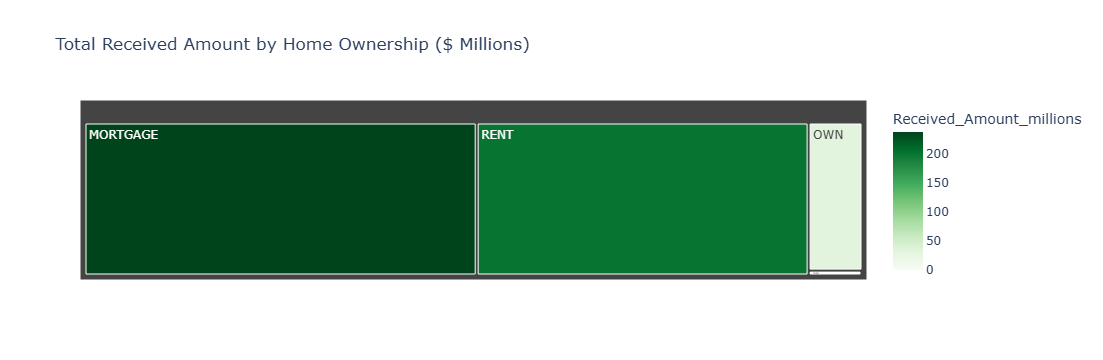

In [100]:
home_received_amount = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_received_amount['Received_Amount_millions'] = home_received_amount['total_payment'] / 1_000_000

fig = px.treemap(
    home_received_amount,
    path=['home_ownership'],
    values='Received_Amount_millions',
    color='Received_Amount_millions',
    color_continuous_scale='greens',
    title='Total Received Amount by Home Ownership ($ Millions)'
)

fig.show()

### Home Ownership  by Total Loan Applications

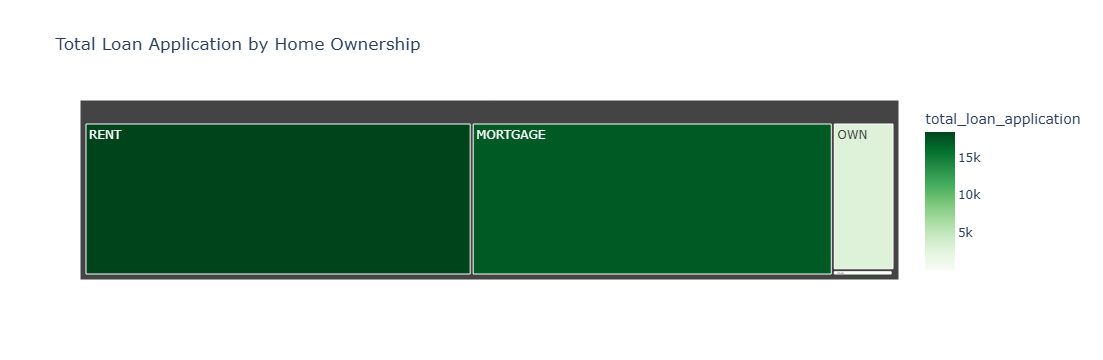

In [106]:
home_loan_applicantion= df.groupby('home_ownership')['id'].count().reset_index()
home_loan_applicantion['total_loan_application'] = home_loan_applicantion['id'] 

fig = px.treemap(
    home_loan_applicantion,
    path=['home_ownership'],
    values='total_loan_application',
    color='total_loan_application',
    color_continuous_scale='greens',
    title='Total Loan Application by Home Ownership '
)

fig.show() 